In [3]:
import numpy as nmp
import pandas as pd

pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('future.no_silent_downcasting', True)

nosPokemons = pd.read_csv("datas/pokedex.csv")

# Affichage des colonnes du Dataframe
print(nosPokemons.columns.values)

# Affichage des 10 1ères lignes
print(nosPokemons.head(10))

# Remplacer BOOL v/f => 1/0
nosPokemonsClean = nosPokemons
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("VRAI", 1)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("FAUX", 0)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].astype(int)
print(nosPokemonsClean.head())

['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'NIVEAU_ATTAQUE'
 'NIVEAU_DEFENSE' 'NIVEAU_ATTAQUE_SPECIALE' 'NIVEAU_DEFENSE_SPECIALE'
 'VITESSE' 'NOMBRE_GENERATIONS' 'LEGENDAIRE']
   NUMERO               NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1        Bulbizarre  Herbe  Poison             45              49   
1       2        Herbizarre  Herbe  Poison             60              62   
2       3        Florizarre  Herbe  Poison             80              82   
3       4   Mega Florizarre  Herbe  Poison             80             100   
4       5         Salameche    Feu     NaN             39              52   
5       6         Reptincel    Feu     NaN             58              64   
6       7         Dracaufeu    Feu     Vol             78              84   
7       8  Mega Dracaufeu X    Feu  Dragon             78             130   
8       9  Mega Dracaufeu Y    Feu     Vol             78             104   
9      10          Carapuce    Eau     NaN     

In [4]:
# Comptage du nb d'observations/features
print(nosPokemonsClean.shape)
# Infos sur notre jeu de données
print(nosPokemonsClean.info())

# Trouver l'observation dont le nom est manquant
print(nosPokemonsClean[nosPokemonsClean['NOM'].isnull()])
print(nosPokemonsClean['NOM'][61])
print(nosPokemonsClean['NOM'][63])
nosPokemonsClean['NOM'][62] = "Colossinge"
print(nosPokemonsClean['NOM'][62])


(800, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      800 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   NIVEAU_ATTAQUE           800 non-null    int64 
 6   NIVEAU_DEFENSE           800 non-null    int64 
 7   NIVEAU_ATTAQUE_SPECIALE  800 non-null    int64 
 8   NIVEAU_DEFENSE_SPECIALE  800 non-null    int64 
 9   VITESSE                  800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB
None
Empty DataFrame
Columns: [NUMERO, NOM, TYPE_1, TYPE_2, POINTS_DE_VIE, NIVEAU_ATTAQUE, N

/tmp/ipykernel_795/1150771829.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nosPokemonsClean['NOM'][62] = "Colossinge"
/tmp/ipykernel_795/1150771829.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [5]:
# === OBSERVATIONS DES COMBATS ===

# Chargement données combats
combats = pd.read_csv("datas/combats.csv")
# Affichage des colonnes du Dataframe
print(combats.columns.values)
# Affichage des 10 1ères lignes
print(combats.head(10))
# Comptage nb lignes/colonnes
print(combats.shape)
# Info jeu de données
print(combats.info())

['Premier_Pokemon' 'Second_Pokemon' 'Pokemon_Gagnant']
   Premier_Pokemon  Second_Pokemon  Pokemon_Gagnant
0              266             298              298
1              702             701              701
2              191             668              668
3              237             683              683
4              151             231              151
5              657             752              657
6              192             134              134
7               73             545              545
8              220             763              763
9              302              31               31
(50000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1

In [6]:
# === NB COMBATS MENÉS ===

nbFoisPremierePosition = combats.groupby('Premier_Pokemon').count()
print(nbFoisPremierePosition) # numero | nb fois 1ère pos | nb fois 1ère pos

nbFoisSecondePosition = combats.groupby('Second_Pokemon').count()
print(nbFoisSecondePosition) # numero | nb fois 2ème pos | nb fois 2ème pos

nbTotalCombats = nbFoisPremierePosition + nbFoisSecondePosition
print(nbTotalCombats) # numero | nb total

                 Second_Pokemon  Pokemon_Gagnant
Premier_Pokemon                                 
1                            70               70
2                            55               55
3                            68               68
4                            62               62
5                            50               50
...                         ...              ...
796                          49               49
797                          64               64
798                          60               60
799                          75               75
800                          61               61

[784 rows x 2 columns]
                Premier_Pokemon  Pokemon_Gagnant
Second_Pokemon                                  
1                            63               63
2                            66               66
3                            64               64
4                            63               63
5                            62              

In [7]:
# === NB COMBATS GAGNÉS ===

nbVictoires = combats.groupby('Pokemon_Gagnant').count()
print(nbVictoires) # numero | nb victoires | nb victoires

print(nbVictoires.info())

                 Premier_Pokemon  Second_Pokemon
Pokemon_Gagnant                                 
1                             37              37
2                             46              46
3                             89              89
4                             70              70
5                             55              55
...                          ...             ...
796                           39              39
797                          116             116
798                           60              60
799                           89              89
800                           75              75

[783 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 1 to 800
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  783 non-null    int64
 1   Second_Pokemon   783 non-null    int64
dtypes: int64(2)
memory usage: 18.4 KB
None


In [8]:
# === AGRÉGATION DES DONNÉES: COMBAT + POKEDEX ===

listeAAgreger = combats.groupby('Pokemon_Gagnant').count()
listeAAgreger.sort_index()

# Ajouter nb combats
listeAAgreger['NB_COMBATS'] = nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant

# Ajouter nb victoires
listeAAgreger['NB_VICTOIRES'] = nbVictoires.Premier_Pokemon

# % victoires
listeAAgreger['POURCENTAGE_VICTOIRES'] = nbVictoires.Premier_Pokemon / (nbFoisPremierePosition.Pokemon_Gagnant 
                                                                + nbFoisSecondePosition.Pokemon_Gagnant)

# Nouvelle liste
print(listeAAgreger)

                 Premier_Pokemon  Second_Pokemon  NB_COMBATS  NB_VICTOIRES  \
Pokemon_Gagnant                                                              
1                             37              37         133            37   
2                             46              46         121            46   
3                             89              89         132            89   
4                             70              70         125            70   
5                             55              55         112            55   
...                          ...             ...         ...           ...   
796                           39              39         105            39   
797                          116             116         131           116   
798                           60              60         119            60   
799                           89              89         144            89   
800                           75              75         121    

In [9]:
# === NOUVEAU POKEDEX ===

nouveauPokedex = nosPokemonsClean.merge(listeAAgreger, left_on='NUMERO', right_index = True, how = 'left')
print(nouveauPokedex.describe())

         NUMERO  POINTS_DE_VIE  NIVEAU_ATTAQUE  NIVEAU_DEFENSE  \
count  800.0000     800.000000      800.000000      800.000000   
mean   400.5000      69.258750       79.001250       73.842500   
std    231.0844      25.534669       32.457366       31.183501   
min      1.0000       1.000000        5.000000        5.000000   
25%    200.7500      50.000000       55.000000       50.000000   
50%    400.5000      65.000000       75.000000       70.000000   
75%    600.2500      80.000000      100.000000       90.000000   
max    800.0000     255.000000      190.000000      230.000000   

       NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE     VITESSE  \
count               800.000000               800.000000  800.000000   
mean                 72.820000                71.902500   68.277500   
std                  32.722294                27.828916   29.060474   
min                  10.000000                20.000000    5.000000   
25%                  49.750000                50.0

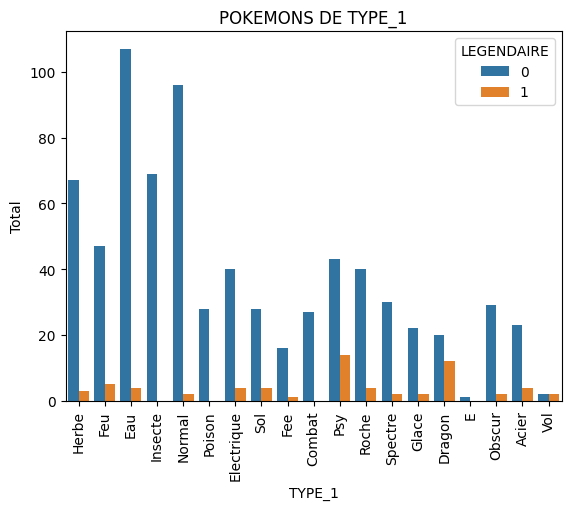

In [ ]:
# === PARTIE 2 ===
import matplotlib.pyplot as plt
import seaborn as sns

axe_X = sns.countplot(x='TYPE_1', hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel("TYPE_1")
plt.ylabel("Total")
plt.title("POKEMONS DE TYPE_1")
plt.show()

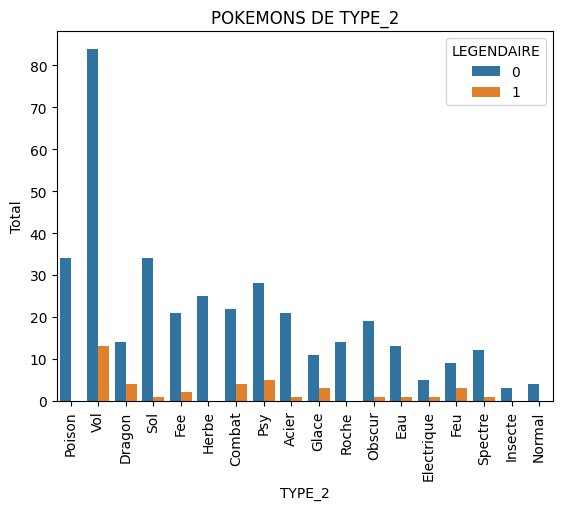

In [11]:
axe_X = sns.countplot(x='TYPE_2', hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel("TYPE_2")
plt.ylabel("Total")
plt.title("POKEMONS DE TYPE_2")
plt.show()

In [14]:
# === VICTOIRES PAR TYPE ===
print(nouveauPokedex.groupby('TYPE_1').agg({"POURCENTAGE_VICTOIRES": "mean"}).sort_values(by="POURCENTAGE_VICTOIRES"))

            POURCENTAGE_VICTOIRES
TYPE_1                           
Fee                      0.329300
E                        0.343750
Roche                    0.404852
Acier                    0.424529
Poison                   0.433262
Insecte                  0.439006
Glace                    0.439604
Herbe                    0.440364
Eau                      0.470520
Combat                   0.475616
Spectre                  0.484027
Normal                   0.535578
Sol                      0.541526
Psy                      0.545747
Feu                      0.579215
Obscur                   0.629726
Electrique               0.632861
Dragon                   0.633587
Vol                      0.765061


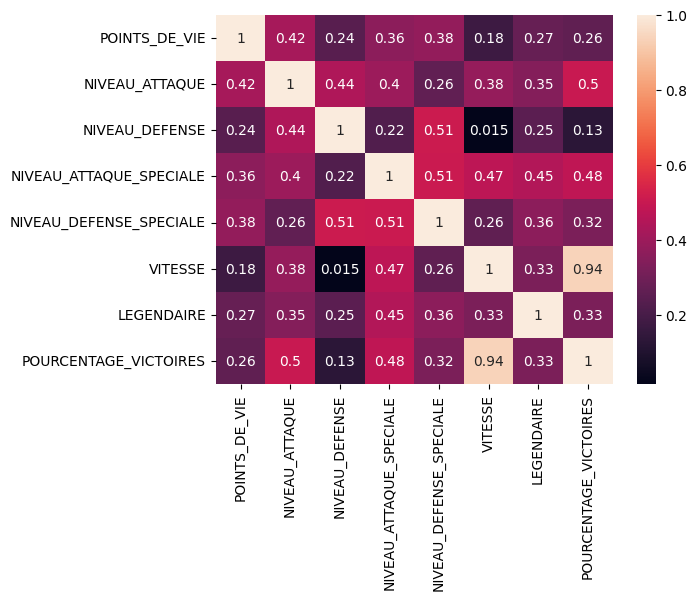

In [17]:
# === CORRÉLATIONS ENTRE LES FEATURES ===
corr = nouveauPokedex.loc[:, ['POINTS_DE_VIE', 'NIVEAU_ATTAQUE', 'NIVEAU_DEFENSE', 'NIVEAU_ATTAQUE_SPECIALE', 
                              'NIVEAU_DEFENSE_SPECIALE', 'VITESSE', 'LEGENDAIRE', 'POURCENTAGE_VICTOIRES']].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [18]:
# === SAUVEGARDE DATAFRAME ===
dataset = nouveauPokedex
dataset.to_csv("datas/dataset.csv", sep='\t')